# VIDEO GAME SALES ANALYSIS


In [36]:
import pandas as pd
## Global Sales Per Genre
path = "./Video_Games_Sales/vgsales.csv"
# LINK TO DATASET: https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv

df = pd.read_csv(path)

df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


## GENRE STATISTICS


In [35]:

# LIST NUMBER OF GAMES PER GENRE

genre_count = df["Genre"].value_counts()

df_genre_count = df["Genre"].value_counts().reset_index()
df_genre_count = df_genre_count.rename(columns={'count': 'Games in genre'})
df_genre_count.head()



,Genre,Games in genre
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310


### SALES PER GENRE


In [34]:
# LIST GLOBAL SALES PER GENRE

df_genre_sales = df.groupby("Genre", as_index=False)["Global_Sales"].sum()
df_genre_sales = df_genre_sales.sort_values(by="Global_Sales", ascending=False)

df_genre_sales = df_genre_sales.rename(columns={'Global_Sales': 'Global sales (millions)'})
df_genre_sales.head()

,Genre,Global sales (millions)
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


In [37]:
# GENRE GLOBAL SALES SUMMARY

df_genre_summary_global = pd.merge(df_genre_sales, df_genre_count, on="Genre")
df_genre_summary_global = df_genre_summary_global.rename(columns={'Global_Sales': 'Global sales (millions)'})

df_genre_summary_global.head()

,Genre,Global sales (millions),Games in genre
0,Action,1751.18,3316
1,Sports,1330.93,2346
2,Shooter,1037.37,1310
3,Role-Playing,927.37,1488
4,Platform,831.37,886


## GENRE SALES PER REGION


In [124]:
# Works the same as it did in database management class- groupby to sum all numerical vales in list
df_sales_by_genre = df.groupby('Genre', as_index=False)[
    ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
].sum()

# Renaming columns to remove underscore and indicate millions unit sales
df_sales_by_genre.rename(columns={
    'Global_Sales': 'Global Sales (millions unit)',
    'NA_Sales': 'NA Sales (millions unit)',
    'EU_Sales': 'EU Sales (millions unit)',
    'JP_Sales': 'JP Sales (millions unit)',
    'Other_Sales': 'Other Sales (millions unit)'
}, inplace=True)

# Sort alphabetically by genre name
df_sales_by_genre = df_sales_by_genre.sort_values(by='Genre')

df_sales_by_genre

,Genre,Global Sales (millions unit),NA Sales (millions unit),EU Sales (millions unit),JP Sales (millions unit),Other Sales (millions unit)
0,Action,1751.18,877.83,525.00,159.95,187.38
1,Adventure,239.04,105.80,64.13,52.07,16.81
2,Fighting,448.91,223.59,101.32,87.35,36.68
3,Misc,809.96,410.24,215.98,107.76,75.32
4,Platform,831.37,447.05,201.63,130.77,51.59
5,Puzzle,244.95,123.78,50.78,57.31,12.55
6,Racing,732.04,359.42,238.39,56.69,77.27
7,Role-Playing,927.37,327.28,188.06,352.31,59.61
8,Shooter,1037.37,582.60,313.27,38.28,102.69
9,Simulation,392.20,183.31,113.38,63.70,31.52


C:\Users\danie\AppData\Local\Temp\ipykernel_8172\1448501063.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = cm.get_cmap('tab20c').colors


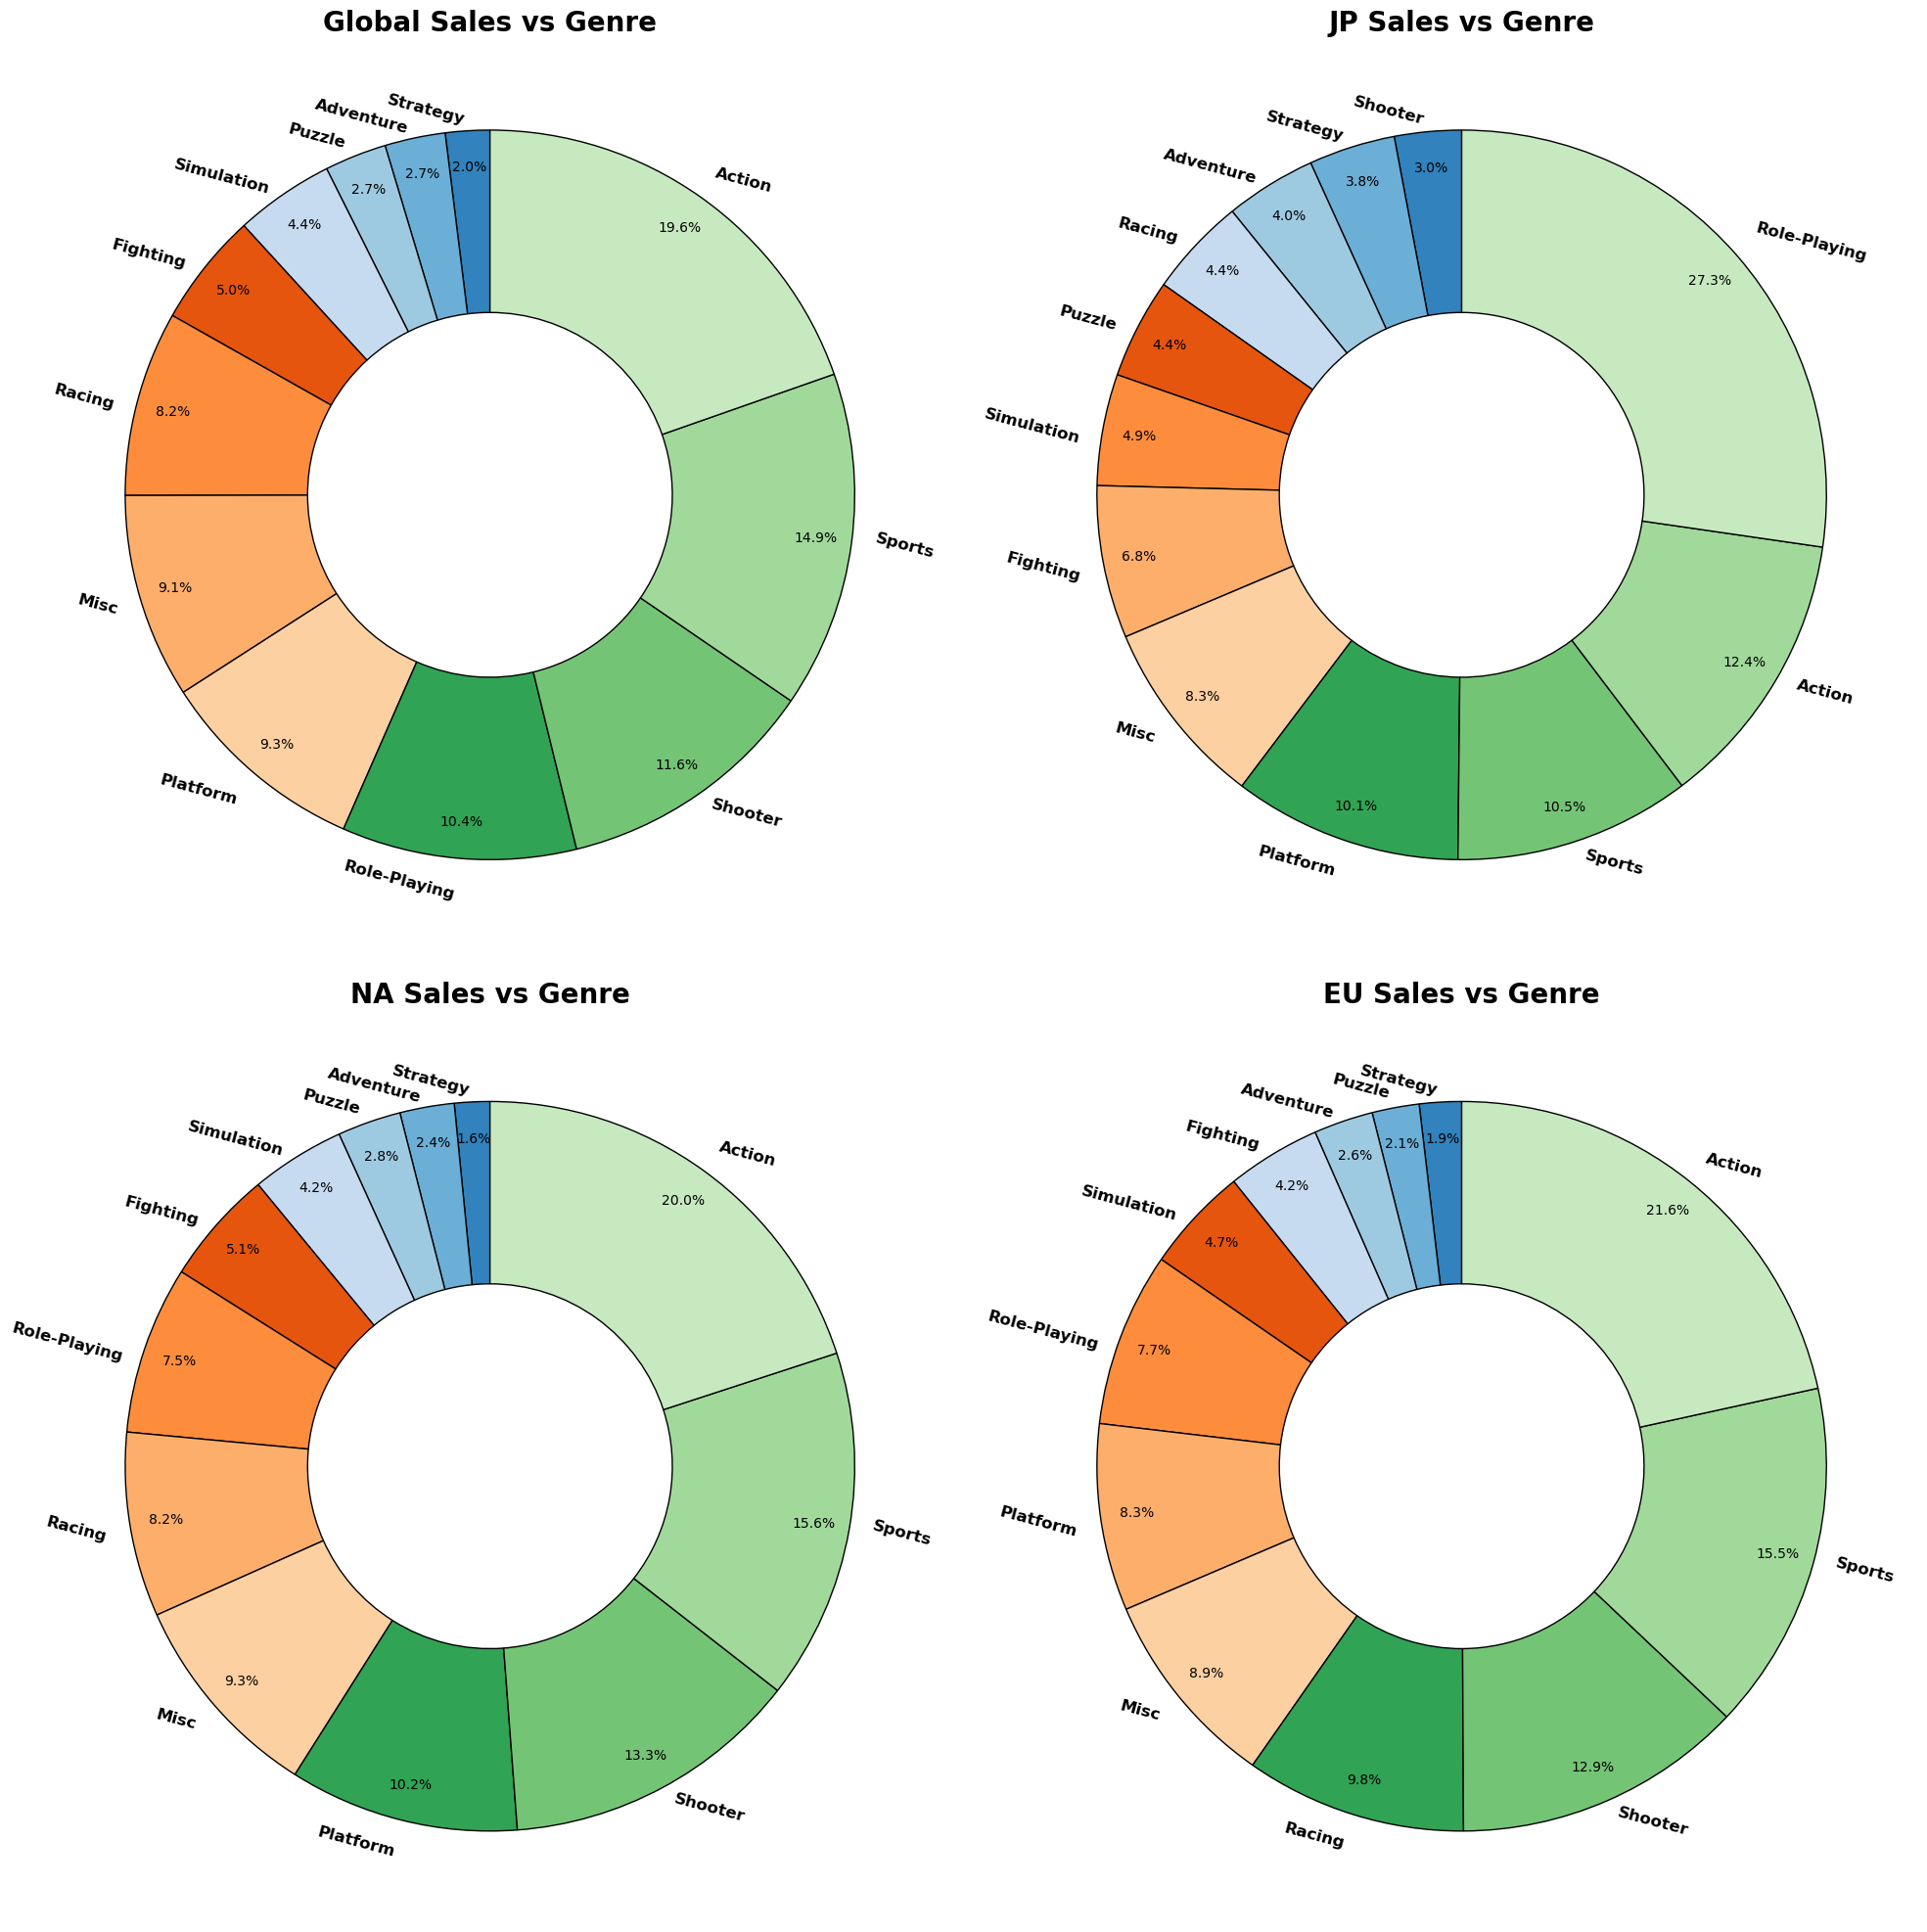

In [211]:
import matplotlib.pyplot as plt
from matplotlib import cm  # For colormap

#CUSTOM COLOR MAP (CM)
color_palette = cm.get_cmap('tab20c').colors

#DATA
df_sales_by_genre_global = df_sales_by_genre.sort_values(by="Global Sales (millions unit)", ascending=True)
df_sales_by_genre_jp = df_sales_by_genre.sort_values(by="JP Sales (millions unit)", ascending=True)
df_sales_by_genre_na = df_sales_by_genre.sort_values(by="NA Sales (millions unit)", ascending=True)
df_sales_by_genre_eu = df_sales_by_genre.sort_values(by="EU Sales (millions unit)", ascending=True)

sales_data_global = df_sales_by_genre_global["Global Sales (millions unit)"]
labels_global = df_sales_by_genre_global["Genre"]

sales_data_jp = df_sales_by_genre_jp["JP Sales (millions unit)"]
labels_jp = df_sales_by_genre_jp["Genre"]

sales_data_na = df_sales_by_genre_na["NA Sales (millions unit)"]
labels_na = df_sales_by_genre_na["Genre"]

sales_data_eu = df_sales_by_genre_eu["EU Sales (millions unit)"]
labels_eu = df_sales_by_genre_eu["Genre"]

#PLOT
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

data_list = [
    {"data": sales_data_global, "labels": labels_global, "pos": ax[0, 0], "title": "Global Sales vs Genre"},
    {"data": sales_data_jp, "labels": labels_jp, "pos": ax[0, 1], "title": "JP Sales vs Genre"},
    {"data": sales_data_na, "labels": labels_na, "pos": ax[1, 0], "title": "NA Sales vs Genre"},
    {"data": sales_data_eu, "labels": labels_eu, "pos": ax[1, 1], "title": "EU Sales vs Genre"},
]
for setting in data_list:
        wedges, texts, autotexts = setting["pos"].pie(
        x=setting["data"], 
        labels=setting["labels"],
        startangle=90,
        labeldistance=1.06,
        wedgeprops={"width":0.5, "edgecolor": "black"},
        autopct='%1.1f%%',
        pctdistance=0.9,
        colors=color_palette
        )
        setting["pos"].set_title(setting["title"], fontsize=20, fontweight=1000)
        for text in texts:
            text.set_rotation(-15)
            text.set_fontsize(12)
            text.set_fontweight(900)
            
        
        
plt.tight_layout()
plt.show()